<a href="https://colab.research.google.com/github/krthkk/DOSM_Income_Analysis/blob/main/Malaysia_DOSM_Income_brackets_Mean_and_Median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the data

In [ ]:
pip install pandas fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00


In [ ]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.googleapis.com/dosm-public-economy/hiesba_percentiles.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

print(df)

      year           state percentile   mean  median  minimum  maximum
0     2019        Malaysia        1st    957    1001      NaN   1141.0
1     2019        Malaysia        2nd   1284    1244   1141.0   1459.0
2     2019        Malaysia        3rd   1556    1559   1460.0   1641.0
3     2019        Malaysia        4th   1718    1718   1642.0   1789.0
4     2019        Malaysia        5th   1858    1856   1790.0   1928.0
...    ...             ...        ...    ...     ...      ...      ...
3395  2022  W.P. Putrajaya       96th  36301   36131  35536.0  37262.0
3396  2022  W.P. Putrajaya       97th  39541   39004  37709.0  41458.0
3397  2022  W.P. Putrajaya       98th  43712   42396  41585.0  48192.0
3398  2022  W.P. Putrajaya       99th  53640   52664  49706.0  57968.0
3399  2022  W.P. Putrajaya      100th  69563   67740  62243.0      NaN

[3400 rows x 7 columns]


2. Run median and mean, classified by Top 1%, Top 20%, M40%, and Bottom 40%

In [ ]:
# Extract data for the specific percentiles/groups
top_1_percent = df[df['percentile'] == '1st']
top_20_percent = df[df['percentile'].isin([f"{i}th" for i in range(1, 21)])]
middle_40_percent = df[df['percentile'].isin([f"{i}th" for i in range(21, 61)])]
bottom_40_percent = df[df['percentile'].isin([f"{i}th" for i in range(61, 101)])]

# Calculate the mean and median for each group
insights = {
    'Top 1%': {
        'Mean Income': top_1_percent['mean'].mean(),
        'Median Income': top_1_percent['median'].mean()
    },
    'Top 20%': {
        'Mean Income': top_20_percent['mean'].mean(),
        'Median Income': top_20_percent['median'].mean()
    },
    'Middle 40%': {
        'Mean Income': middle_40_percent['mean'].mean(),
        'Median Income': middle_40_percent['median'].mean()
    },
    'Bottom 40%': {
        'Mean Income': bottom_40_percent['mean'].mean(),
        'Median Income': bottom_40_percent['median'].mean()
    }
}

insights


{'Top 1%': {'Mean Income': 1325.5588235294117,
  'Median Income': 1377.3529411764705},
 'Top 20%': {'Mean Income': 2917.5865051903115,
  'Median Income': 2917.887543252595},
 'Middle 40%': {'Mean Income': 5373.726890756303,
  'Median Income': 5373.985294117647},
 'Bottom 40%': {'Mean Income': 13773.38130252101,
  'Median Income': 13542.51680672269}}

3. Visualise

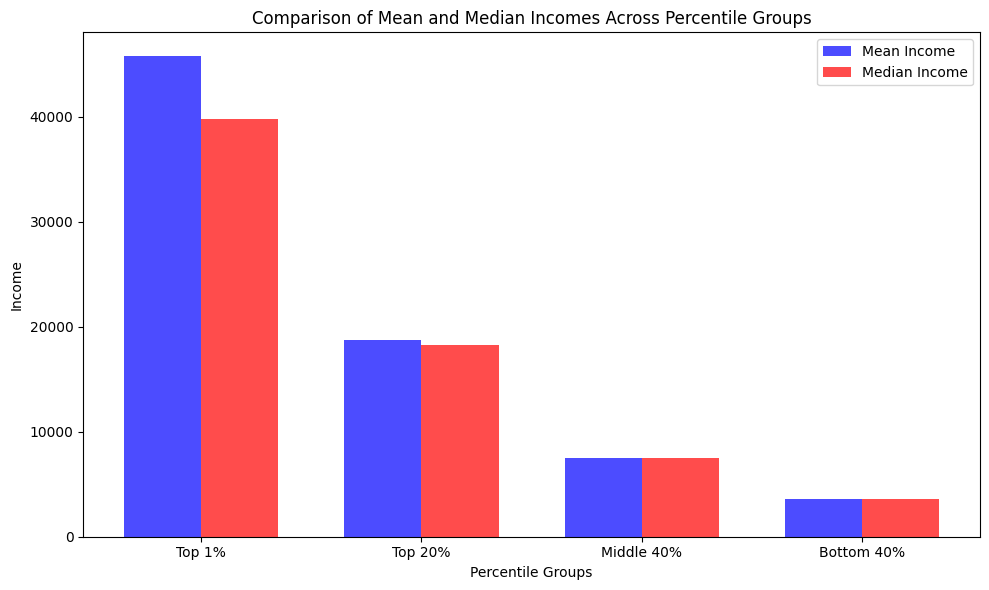

In [ ]:
import matplotlib.pyplot as plt

# Extracting data for plotting
groups = list(corrected_insights.keys())
mean_incomes = [corrected_insights[group]['Mean Income'] for group in groups]
median_incomes = [corrected_insights[group]['Median Income'] for group in groups]

# Setting up the bar chart
bar_width = 0.35
index = range(len(groups))

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, mean_incomes, bar_width, label='Mean Income', color='b', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], median_incomes, bar_width, label='Median Income', color='r', alpha=0.7)

# Labelling the chart
ax.set_xlabel('Percentile Groups')
ax.set_ylabel('Income')
ax.set_title('Comparison of Mean and Median Incomes Across Percentile Groups')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(groups)
ax.legend()

plt.tight_layout()
plt.show()
